# Visualization of Center of the Eyes, Nose and Mouth

## 0. Import Packages

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
import os
import matplotlib.patches as patches
import random
from math import dist

## 1. Make image dataset

In [198]:
emotions = os.listdir('test')
emotions = np.array(emotions)
print(emotions)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [199]:
for emo in emotions:
    globals()['x_test_{}'.format(emo)] = []
    globals()['name_{}'.format(emo)] = os.listdir('test/' + emo)
    for i in range(len(globals()['name_{}'.format(emo)])):
        img = Image.open('test/'+ emo + '/' + globals()['name_{}'.format(emo)][i]).convert("L")
        img_resize = img.resize((96,96))  # resize
        img_resize = np.array(img_resize)
        img_resize = img_resize/255  # normalize
        globals()['x_test_{}'.format(emo)].append(img_resize)

    globals()['x_test_{}'.format(emo)] = np.array(globals()['x_test_{}'.format(emo)])

In [200]:
np.shape(name_angry)

(958,)

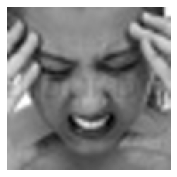

Shape of image dataset : (958, 96, 96)


In [201]:
plt.rcParams["figure.figsize"] = (3,3)
ind = 111
plt.imshow(x_test_angry[ind,:,:], cmap = 'gray')
plt.axis('off')
plt.show()
print("Shape of image dataset :", x_test_angry.shape)

## 2. Make landmark dataset

In [202]:
for emo in emotions:
    globals()['y_test_{}'.format(emo)] = []
    name = globals()['name_{}'.format(emo)]
    for i in range(len(name)):
        name = globals()['name_{}'.format(emo)]
        pred = np.loadtxt('land_mark/' + emo + '/' + name[i][:-4] + '.txt')
        globals()['y_test_{}'.format(emo)].append(pred)

    globals()['y_test_{}'.format(emo)] = np.array(globals()['y_test_{}'.format(emo)])

In [203]:
print("Shape of pred :", y_test_angry.shape)

Shape of pred : (958, 30)


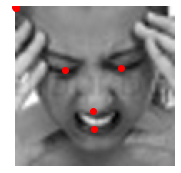

Shape of prediction dataset : (958, 30)


In [204]:
plt.imshow(x_test_angry[ind,:,:], cmap='gray')
plt.scatter(y_test_angry[ind,:][0:-1:2], y_test_angry[ind,:][1::2], c ='r')  # divide x-coordinate and y-coordinate
plt.axis("off")
plt.show()
print("Shape of prediction dataset :", y_test_angry.shape)

## 3. Center points

In [205]:
keypts = pd.read_csv("facial_keypoints.csv", header = None)
location = keypts.to_numpy()
print(location)
print(location.shape)

[['left_eye_center_x' 'left_eye_center_y' 'right_eye_center_x'
  'right_eye_center_y' 'left_eye_inner_corner_x'
  'left_eye_inner_corner_y' 'left_eye_outer_corner_x'
  'left_eye_outer_corner_y' 'right_eye_inner_corner_x'
  'right_eye_inner_corner_y' 'right_eye_outer_corner_x'
  'right_eye_outer_corner_y' 'left_eyebrow_inner_end_x'
  'left_eyebrow_inner_end_y' 'left_eyebrow_outer_end_x'
  'left_eyebrow_outer_end_y' 'right_eyebrow_inner_end_x'
  'right_eyebrow_inner_end_y' 'right_eyebrow_outer_end_x'
  'right_eyebrow_outer_end_y' 'nose_tip_x' 'nose_tip_y'
  'mouth_left_corner_x' 'mouth_left_corner_y' 'mouth_right_corner_x'
  'mouth_right_corner_y' 'mouth_center_top_lip_x'
  'mouth_center_top_lip_y' 'mouth_center_bottom_lip_x'
  'mouth_center_bottom_lip_y']]
(1, 30)


In [206]:
center_inds = np.array([0, 2, -10, -2])
center_pts_x = location[:, center_inds]
center_pts_y = location[:, center_inds + 1]

print(center_pts_x, "\n", center_pts_y)

[['left_eye_center_x' 'right_eye_center_x' 'nose_tip_x'
  'mouth_center_bottom_lip_x']] 
 [['left_eye_center_y' 'right_eye_center_y' 'nose_tip_y'
  'mouth_center_bottom_lip_y']]


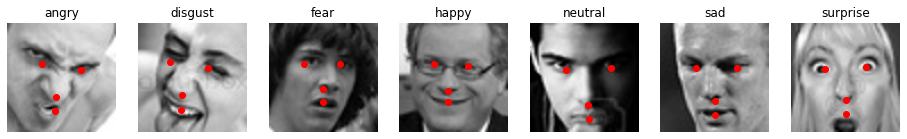

In [207]:
plt.rcParams["figure.figsize"] = (16, 40)

for i in range(len(emotions)):
    index = 22
    plt.subplot(1, 7, i+1)
    
    plt.imshow(globals()['x_test_{}'.format(emotions[i])][index,:,:], cmap='gray')
    plt.scatter(globals()['y_test_{}'.format(emotions[i])][index,:][center_inds], 
                globals()['y_test_{}'.format(emotions[i])][index,:][center_inds+1], c ='r')  
    plt.title(emotions[i])
    plt.axis("off")
plt.show()    

In [208]:
center_pts_x = location[:, center_inds]
center_pts_y = location[:, center_inds + 1]

print(center_pts_x, "\n", center_pts_y)
center_inds

[['left_eye_center_x' 'right_eye_center_x' 'nose_tip_x'
  'mouth_center_bottom_lip_x']] 
 [['left_eye_center_y' 'right_eye_center_y' 'nose_tip_y'
  'mouth_center_bottom_lip_y']]


array([  0,   2, -10,  -2])

## 4. Distances of center points

In [209]:
def dist_pts(x_pts, y_pts):
    
    left_eye = (x_pts[0], y_pts[0])
    right_eye = (x_pts[1], y_pts[1])
    nose = (x_pts[2], y_pts[2])
    mouth = (x_pts[3], y_pts[3])
    
    left_eye_nose = dist(left_eye, nose)
    right_eye_nose = dist(right_eye, nose)
    nose_mouth = dist(mouth, nose)
    
    return left_eye_nose, right_eye_nose, nose_mouth

In [217]:
distance = []
for i in range(len(emotions)):

    name = globals()['name_{}'.format(emotions[i])]
    sum1 = 0
    sum2 = 0
    for j in range(len(name)):
        x = np.zeros(4)
        for k in range(4):
            x[k] = globals()['y_test_{}'.format(emotions[i])][j, center_inds[k]]
            y[k] = globals()['y_test_{}'.format(emotions[i])][j, center_inds[k] + 1]
        leye_nose, reye_nose, nose_mouth = dist_pts(x, y)
        sum1 += leye_nose + reye_nose
        sum2 += nose_mouth
    
    mean1 = sum1/(len(name)*2)
    mean2 = sum2/len(name)
    
    distance.append([mean1, mean2])
    
distance = np.array(distance)    

In [218]:
print(distance.shape)
print(emotions)

(7, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


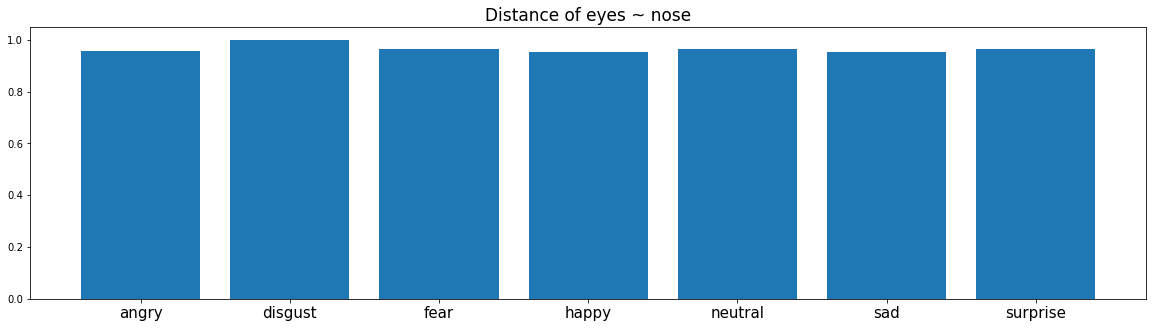

Max : disgust
Min : happy


In [236]:
plt.rcParams["figure.figsize"] = (20,5)
plt.bar(emotions, distance[:,0]/np.max(distance[:,0]))
plt.xticks(fontsize = 15)
plt.title("Distance of eyes ~ nose", fontsize = 17)
plt.show()

print("Max :", emotions[np.argmax(distance[:,0])])
print("Min :", emotions[np.argmin(distance[:,0])])

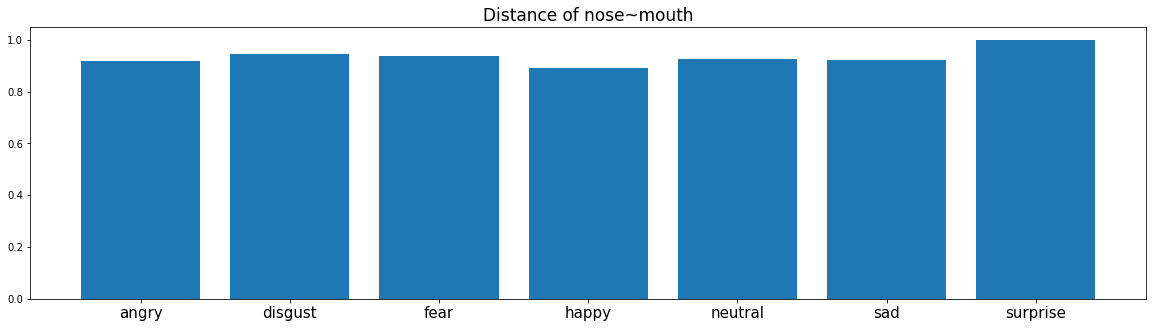

Max : surprise
Min : happy


In [237]:
plt.rcParams["figure.figsize"] = (20,5)
plt.bar(emotions, distance[:,1]/np.max(distance[:,1]))
plt.xticks(fontsize = 15)
plt.title("Distance of nose~mouth", fontsize = 17)
plt.show()

print("Max :", emotions[np.argmax(distance[:,1])])
print("Min :", emotions[np.argmin(distance[:,1])])